In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
#from ReadKTOutputFile import *
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib notebook

In [3]:
def bayesian_efficiency(n, k):

    mean = (k+1)/(n+2)
    mode = k/n
    var = ((k+1)*(k+2))/((n+2)*(n+3))-(k+1)**2/(n+2)**2
    mode_errors = [mode - (mean-np.sqrt(var)), mean+np.sqrt(var) - mode]
    
    return mean, mode, np.sqrt(var), mode_errors


def LoadFilelist(mypath, search_str = '.'):
    '''
    Get list of all files fullfilling a few naming conditions
    '''
    filelist = []
    print('Searching files in {} with "{}" in filename'.format(mypath, search_str))
    for (dirpath, dirnames, filenames) in os.walk(mypath):
        for name in filenames:
            if '.root' in name and search_str in name:
                filelist.append(name)
    return filelist

def GetEventIdFromFilename(filename):
    splitted_name = filename.replace('.', '_')
    splitted_name = splitted_name.split('_')
    for s in splitted_name:
        #print(s)
        if s.isdigit():
            break
    return s

# get list of files

def get_path_list(paths, slopes):
    list = []
    for path in paths:
        for slope in slopes:
            list.append(path + str(slope))
    return list

In [4]:
with open('../202003_cluster_job/true_frequencies.json') as true_freq_file:
    true_freq = np.asarray(json.load(true_freq_file))
with open('../20200213_sierra_jobs/reconstructed_frequencies.json') as rec_freq_file:
    rec_freq = np.asarray(json.load(rec_freq_file))

with open('../202003_cluster_job/simulated_slope.json') as sim_slope_file:
    simulated_slope = np.asarray(json.load(sim_slope_file))
with open('../202003_cluster_job/simulated_slope_event.json') as sim_slope_event_file:
    reconstructed_slope = json.load(sim_slope_event_file)

with open('../202003_cluster_job/simulated_start_times.json') as sim_start_times_file:
    true_track_times = json.load(sim_start_times_file)
with open('../202003_cluster_job/reconstructed_start_times.json') as rec_start_times_file:
    reconstructed_track_times = json.load(rec_start_times_file)

with open('../202003_cluster_job/simulated_snr.json') as sim_snr_file:
    simulated_snr = np.asarray(json.load(sim_snr_file))
with open('../202003_cluster_job/simulated_snr_event.json') as sim_snr_event_file:
    reconstructed_snr = json.load(sim_snr_event_file)

In [5]:
reconstructed_slope_arr = np.asarray(reconstructed_slope)
reconstructed_snr_arr = np.asarray(reconstructed_snr)

In [6]:
print(np.max(simulated_slope))

0.9999898090881608


In [26]:
snr_int_reconstructed = [0, 5, 10, 15, 20, np.round(np.max(reconstructed_snr), 1)]
snr_int_simulated = [0, 5, 10, 15, 20, np.round(np.max(simulated_snr.flatten()), 1)]
slope_int = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]#, 1.1, 1.2]
snr_colors = ['b', 'm', 'g', 'r']
slope_colors = ['b', 'm', 'g', 'r', 'c', 'y', 'k', 'orange', 'purple', 'pink', 'blue']
snr_labels = []
slope_labels = []
snr_slope_maskr = []
snr_slope_masks = []
slope_snr_maskr = []
slope_snr_masks = []
#creating masks for different snr intervals
for i in range(len(snr_int_reconstructed) - 1):
    snr_slope_maskr.append(np.where((reconstructed_snr_arr >= snr_int_reconstructed[i]) 
                                    & (reconstructed_snr_arr < snr_int_reconstructed[i+1]))[0])
    
for i in range(len(snr_int_simulated) - 1):
    snr_slope_masks.append(np.where((simulated_snr.flatten() >= snr_int_simulated[i]) 
                                    & (simulated_snr.flatten() < snr_int_simulated[i+1]))[0])
    snr_labels.append(str(snr_int_simulated[i]) + ' - ' + str(snr_int_simulated[i+1]))
    

#creating masks for different slopes
for i in range(len(slope_int) - 1):
    slope_snr_maskr.append(np.where((reconstructed_slope_arr >= slope_int[i]) 
                                    & (reconstructed_slope_arr < slope_int[i+1]))[0])

for i in range(len(slope_int) - 1):
    slope_snr_masks.append(np.where((simulated_slope.flatten() >= slope_int[i]) 
                                    & (simulated_slope.flatten() < slope_int[i+1]))[0])
    slope_labels.append(str(slope_int[i]) + ' - ' + str(slope_int[i+1]))

In [8]:
print(len(reconstructed_snr_arr))
print(len(simulated_snr.flatten()))
print(len(reconstructed_slope_arr))
print(len(simulated_slope.flatten()))

376
62717
376
62717


<IPython.core.display.Javascript object>


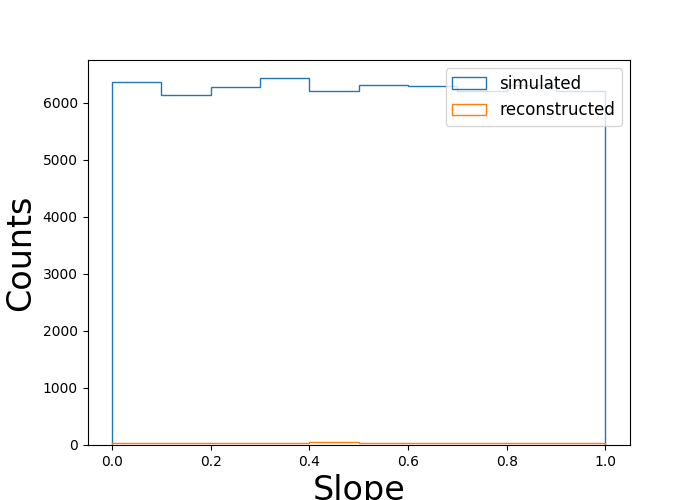

In [9]:
######################## simulation vs reconstruction plots
plt.figure(figsize=(7,5))
##total counts per slope
plt.tight_layout()
#bins = np.linspace(np.min(simulated_slope), np.max(simulated_slope), 10)
bins = np.arange(np.min(slope_int), np.max(slope_int)+0.1, 0.1)
n0, b0, p0 = plt.hist(simulated_slope.flatten(), bins=bins, histtype='step', label='simulated')
n1, b1, p1 = plt.hist(reconstructed_slope, bins=bins, histtype='step', label='reconstructed')
#plt.xlim(0, 1.0, 0.1)
plt.xlabel('Slope', fontsize=24)
plt.ylabel('Counts', fontsize=24)
plt.legend(fontsize=12, loc=0)
#plt.savefig('../spring_quarter/Slopescan_20190502/total_counts_per_slope.png')

<IPython.core.display.Javascript object>


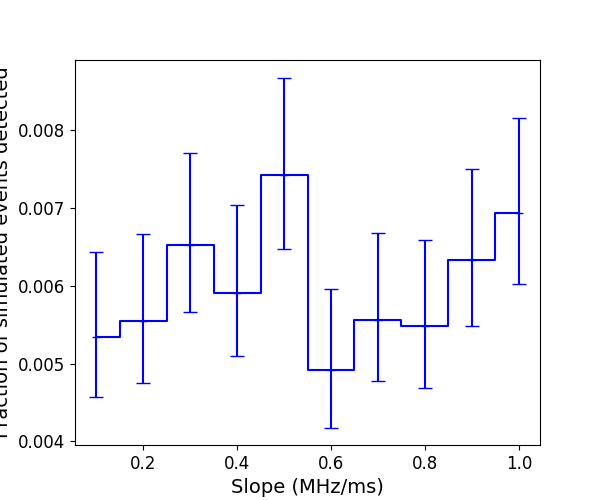

In [10]:
plt.figure(figsize=(6,5))
##fraction of reconstructed events per slope
#plt.tight_layout()
plt.step(bins[1:], n1/n0, color='b', where='mid')
mean1, mode1, var1, mode_errors1 = bayesian_efficiency(n0, n1)
plt.errorbar(b0[1:], mode1, yerr=mode_errors1, linestyle='', capsize=5, color='b', fmt='_')
#plt.xlim(0, 1.0, 0.1)
plt.xlabel('Slope (MHz/ms)', fontsize=14)
plt.ylabel('Fraction of simulated events detected', fontsize=14)
plt.tick_params(axis='both', labelsize=12)
#plt.savefig('../../spring_quarter/Slopescan_20190502/fraction_of_events_per_slope.png')

<IPython.core.display.Javascript object>


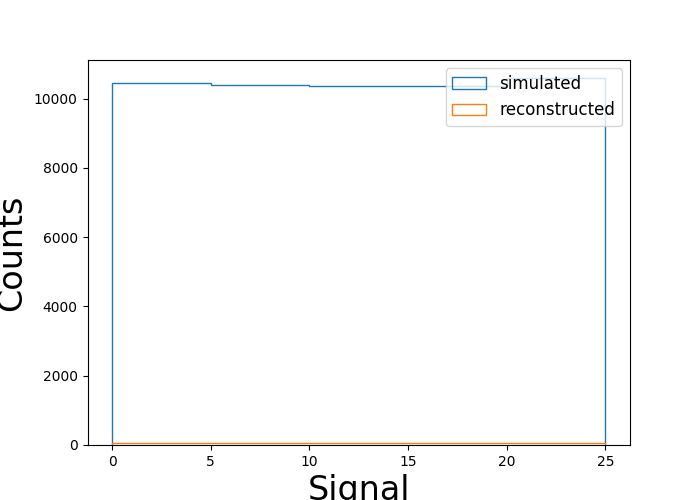

In [11]:
plt.figure(figsize=(7,5))
##total counts per snr range
plt.tight_layout()
bins2 = np.arange(np.min(snr_int_simulated), np.max(snr_int_simulated), 5)
n2, b2, p2 = plt.hist(simulated_snr.flatten(), bins=bins2, histtype='step', label='simulated')
n3, b3, p3 = plt.hist(reconstructed_snr, bins=bins2, histtype='step', label='reconstructed')
plt.xlabel('Signal', fontsize=24)
plt.ylabel('Counts', fontsize=24)
plt.legend(fontsize=12, loc=0)
#plt.savefig('../spring_quarter/Slopescan_20190502/total_counts_per_snr.png')

<IPython.core.display.Javascript object>


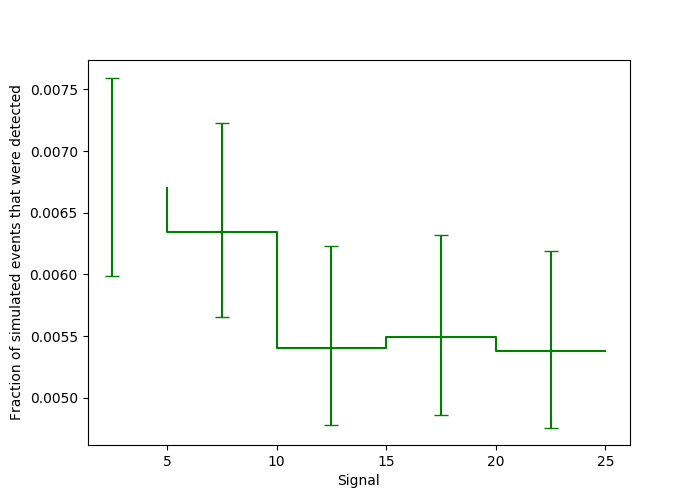

Text(0, 0.5, 'Fraction of simulated events that were detected')

In [12]:
plt.figure(figsize=(7,5))
##fraction of reconstructed events per snr
plt.tight_layout()
plt.step(bins2[1:], n3/n2, color='g')
mean2, mode2, var2, mode_errors2 = bayesian_efficiency(n2, n3)
plt.errorbar(b2[1:]-((bins2[1]-bins[0])/2), mode2, yerr=mode_errors2, linestyle='', capsize=5, color='g')
plt.xlabel('Signal')#, fontsize=24)
plt.ylabel('Fraction of simulated events that were detected')#, fontsize=24)
#plt.savefig('../spring_quarter/Slopescan_20190502/fraction_of_events_per_snr.png')

<IPython.core.display.Javascript object>


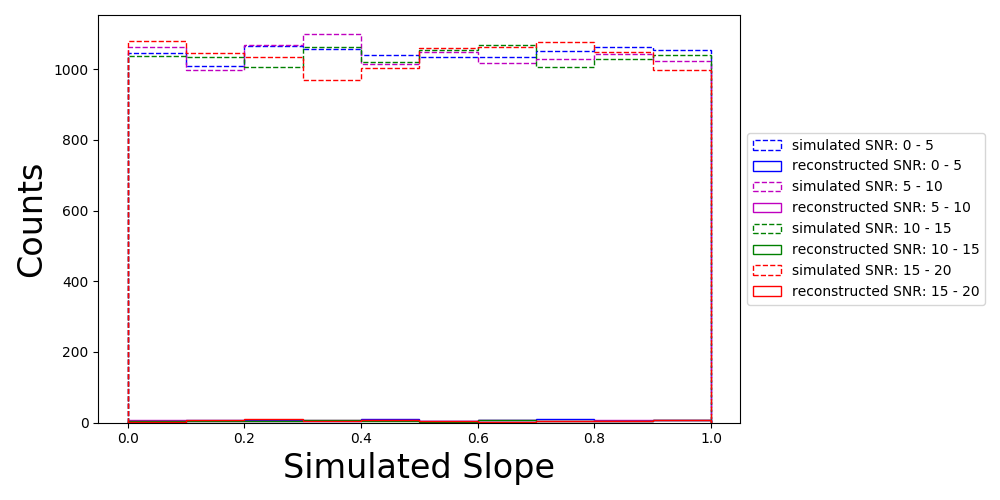

In [13]:
plt.figure(figsize=(10,5))
##counts per slope in each snr interval
sim_slope_list = []
rec_slope_list = []
for each_r, each_s, color, label in zip(snr_slope_maskr, snr_slope_masks, snr_colors, snr_labels):
    n_0, b_0, p_0 = plt.hist([simulated_slope.flatten()[i] for i in each_s], bins=bins, histtype='step', label='simulated SNR: '+label, color=color, linestyle='--')
    sim_slope_list.append([n_0, b_0, p_0])
    n_1, b_1, p_1 = plt.hist([reconstructed_slope[i] for i in each_r], bins=bins, histtype='step', label='reconstructed SNR: '+label, color=color, linestyle='-')
    rec_slope_list.append([n_1, b_1, p_1])
plt.xlabel('Simulated Slope', fontsize=24)
plt.ylabel('Counts', fontsize=24)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig('../spring_quarter/Slopescan_20190502/counts_per_slope_snrint.png')

<IPython.core.display.Javascript object>


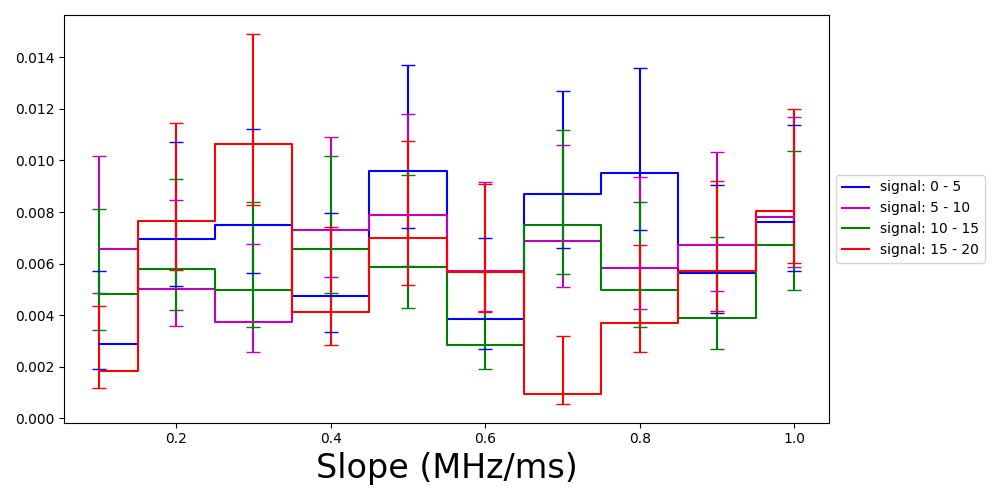

In [15]:
plt.figure(figsize=(10,5))
##fraction of reconstructed events per slope in each snr interval
for s, r, color, label in zip(sim_slope_list, rec_slope_list, snr_colors, snr_labels):
    plt.step(bins[1:],(r[0])/(s[0]), color=color, label='signal: '+label, where='mid')
    mean3, mode3, var3, mode_errors3 = bayesian_efficiency(s[0], r[0])
    plt.errorbar(s[1][1:], mode3, yerr=mode_errors3, linestyle='', color=color, capsize=5)
plt.xlabel('Slope (MHz/ms)', fontsize=24)
#plt.ylabel('Fraction of simulated events that were detected', fontsize=24)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig('../spring_quarter/Slopescan_20190502/fraction_per_slope_snrint.png')

<IPython.core.display.Javascript object>


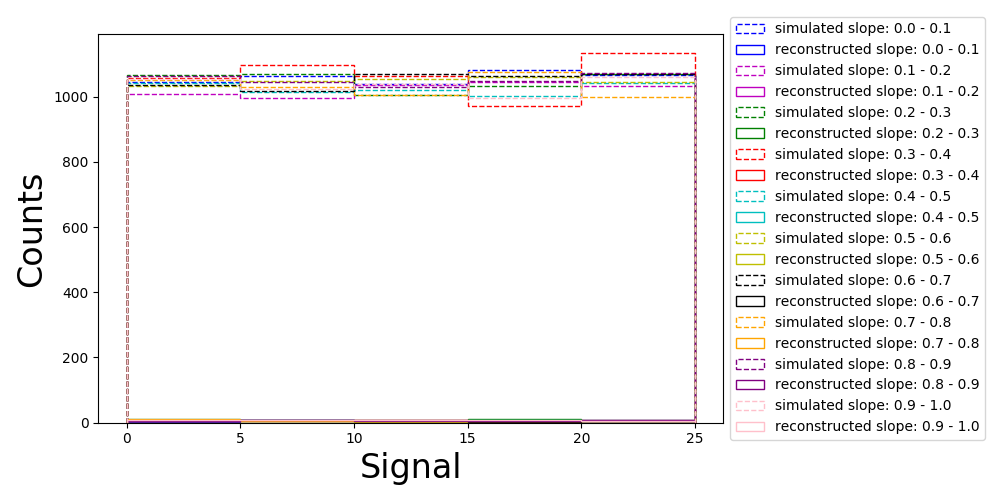

In [27]:
plt.figure(figsize=(10,5))
##counts per snr interval in each slope
sim_snr_list = []
rec_snr_list = []
for each_r, each_s, color, label in zip(slope_snr_maskr, slope_snr_masks, slope_colors, slope_labels):
    n_2, b_2, p_2 = plt.hist([simulated_snr.flatten()[i] for i in each_s], bins=bins2, histtype='step', label='simulated slope: '+label, color=color, linestyle='--')
    sim_snr_list.append([n_2, b_2, p_2])
    n_3, b_3, p_3 = plt.hist([reconstructed_snr[i] for i in each_r], bins=bins2, histtype='step', label='reconstructed slope: '+label, color=color, linestyle='-')
    rec_snr_list.append([n_3, b_3, p_3])
plt.xlabel('Signal', fontsize=24)
plt.ylabel('Counts', fontsize=24)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig('../spring_quarter/Slopescan_20190502/counts_per_snr_slopeint.png')

<IPython.core.display.Javascript object>


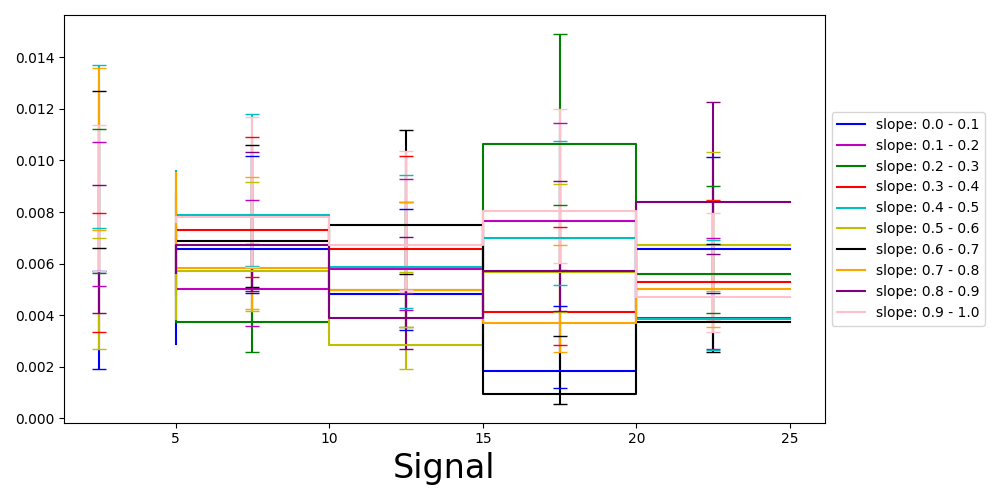

In [28]:
plt.figure(figsize=(10,5))
##fraction of reconstructed events per snr in each slope interval
for s, r, color, label in zip(sim_snr_list, rec_snr_list, slope_colors, slope_labels):
    plt.step(bins2[1:],(r[0])/(s[0]), color=color, label='slope: '+label)
    mean4, mode4, var4, mode_errors4 = bayesian_efficiency(s[0], r[0])
    plt.errorbar(s[1][1:]-((bins2[1]-bins2[0])/2), mode4, yerr=mode_errors4, linestyle='', color=color, capsize=5)
plt.xlabel('Signal', fontsize=24)
#plt.ylabel('Fraction of simulated events that were detected', fontsize=24)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig('../spring_quarter/Slopescan_20190502/fraction_per_snr_slopeint.png')

<IPython.core.display.Javascript object>


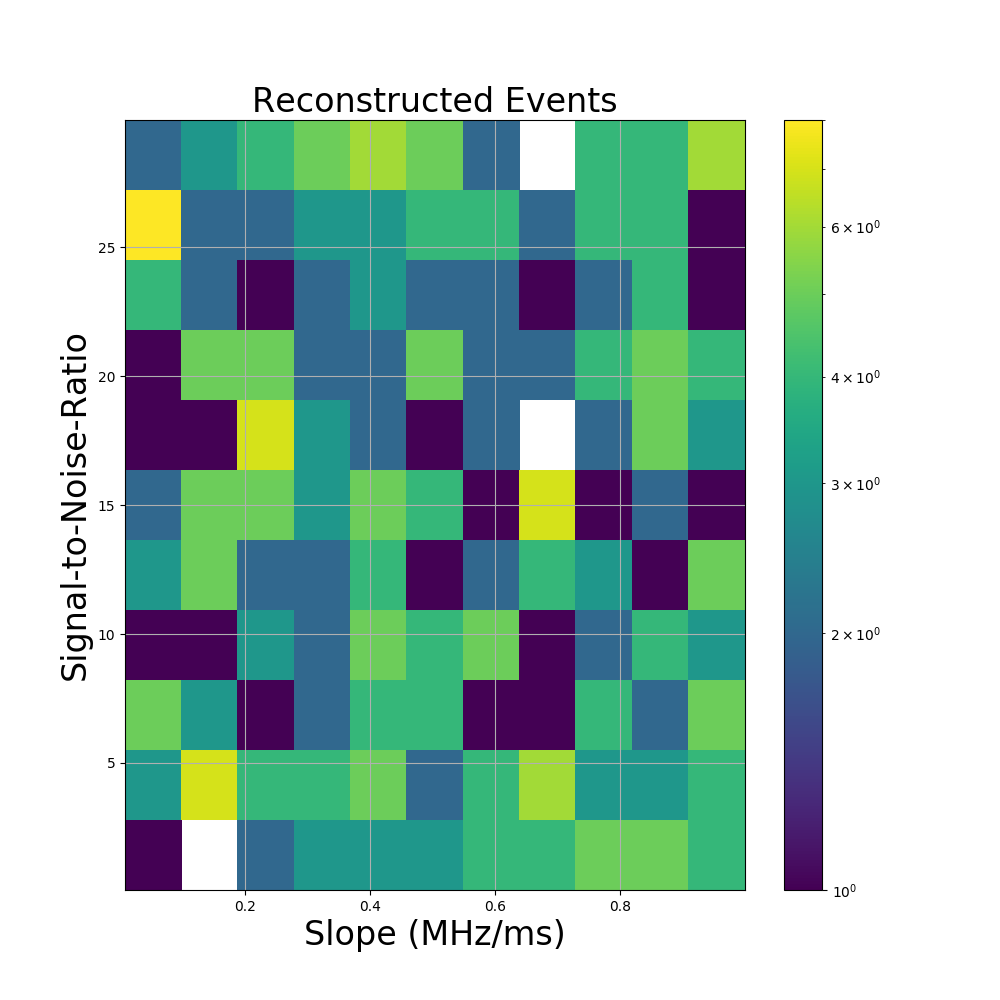

<IPython.core.display.Javascript object>


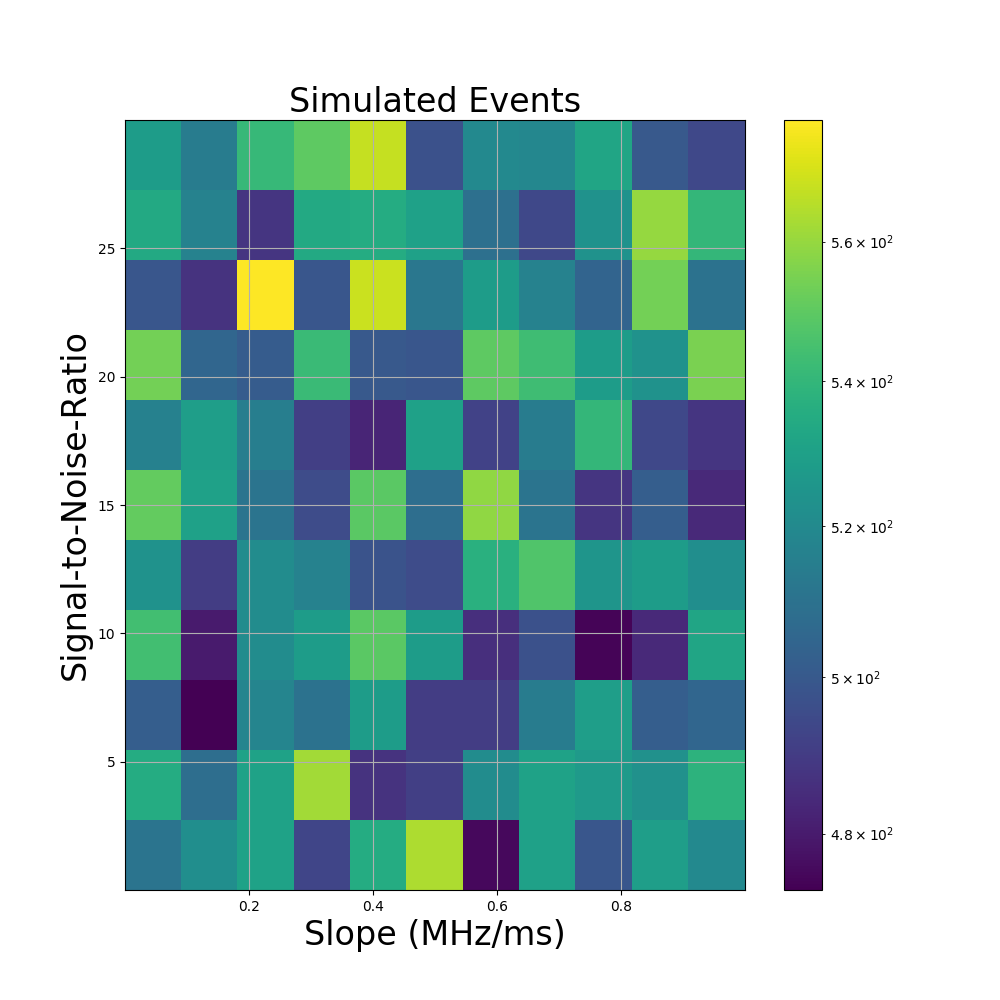

In [21]:
#plot heatmap
from matplotlib import colors
fig, ax = plt.subplots(figsize=(10,10))
plt.xlabel('Slope (MHz/ms)', fontsize=24)
plt.ylabel('Signal-to-Noise-Ratio', fontsize=24)
plt.title('Reconstructed Events', fontsize=24)
#hist = ax.hist2d(n02/n01, n04/n03, bins=11, norm=colors.LogNorm())
hist1 = plt.hist2d(reconstructed_slope_arr, reconstructed_snr_arr, bins=11, norm=colors.LogNorm())
plt.colorbar(hist1[3])
plt.grid()
plt.show()
fig,ax = plt.subplots(figsize=(10,10))
plt.xlabel('Slope (MHz/ms)', fontsize=24)
plt.ylabel('Signal-to-Noise-Ratio', fontsize=24)
plt.title('Simulated Events', fontsize=24)
hist2 = plt.hist2d(simulated_slope.flatten(), simulated_snr.flatten(), bins=11, norm=colors.LogNorm())
plt.colorbar(hist2[3])
plt.grid()
plt.show()
#CHANGE THIS!!!!!!!!!!
#plt.savefig('../spring_quarter/Slopescan_20190502/slope_snr_heatmap.png')

In [22]:
# #fig, ax = plt.subplots(figsize=(10,10))
# fig = plt.subplots(figsize=(10,10))
# plt.xticks(np.arange(11), ('0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0', '1.1'))
# plt.yticks(np.arange(0, 11, step=2.75), ('5', '10', '15', '20', '25'))
# plt.imshow(np.transpose(hist1[0]/hist2[0]), origin='lower')
# plt.colorbar()
# #plt.savefig('../spring_quarter/Slopescan_20190502/slope_snr_heatmap_new.png')

In [23]:
# mean4, mode4, var4, mode_errors4 = bayesian_efficiency(s[0], r[0])
#     plt.errorbar(s[1][1:]-((bins2[1]-bins2[0])/2), mode4, yerr=mode_errors4, linestyle='', color=color, capsize=5)

In [24]:
for s in sim_slope_list:
    print(s[1][1:])
print(((bins2[1]-bins2[0])/2))
print((bins[1]-bins[0])/2)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
2.5
0.05


<IPython.core.display.Javascript object>


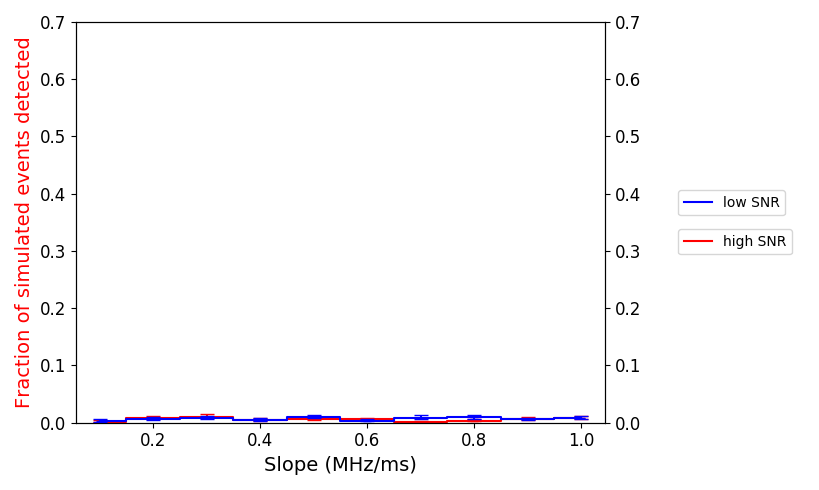

In [25]:
plt.figure(figsize=(8.2,4.9))
ax = plt.gca()
ax2 = ax.twinx()

sim = []
mean5 = []
mode5 = []
var5 = []
mode_errors5 = []
fraction_of_slopes = []
for s, r, in zip(sim_slope_list, rec_slope_list):
    sim.append(s[1][1:])
    fraction_of_slopes.append(r[0]/s[0])
    mean, mode, var, mode_errors = bayesian_efficiency(s[0], r[0])
    mean5.append(mean)
    mode5.append(mode)
    var5.append(var)
    mode_errors5.append(mode_errors)
ax.step(bins[1:], fraction_of_slopes[-1], color='red', label='high SNR', where='mid')
ax.errorbar(sim[-1], mode5[-1], yerr=mode_errors5[-1], fmt='_', color='red', capsize=5)
ax2.step(bins[1:], fraction_of_slopes[0], color='blue', label='low SNR', where = 'mid')
ax2.errorbar(sim[0], mode5[0], yerr=mode_errors5[0], fmt='_', color='blue', capsize=5)
#-((bins[1]-bins[0])/2)
ax.legend(loc='upper left', bbox_to_anchor=(1.125, 0.5))
ax2.legend(loc='lower left', bbox_to_anchor=(1.125, 0.5))
ax.set_xlabel('Slope (MHz/ms)', fontsize=14)
ax.set_ylabel('Fraction of simulated events detected', fontsize=14)#, color='red')
#ax2.set_ylabel('Fraction of simulated events detected', fontsize=14, color='blue')
ax.yaxis.label.set_color('red')
ax2.yaxis.label.set_color('blue')
ax.set_ylim(0, 0.7)
ax2.set_ylim(0, 0.7)
ax.tick_params(axis='both', labelsize=12)
ax2.tick_params(labelsize=12)
#print(sim)
#print(mode_errors5)
plt.tight_layout()
#plt.savefig('../../spring_quarter/Slopescan_20190502/highvlow_snr.png')